In [3]:
# Using GitHub's Copilot to solve MNIST
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
# Reshape dataset to have a single channel
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [8]:
# Normalize the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [9]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
# create a CNN model
model = keras.Sequential(
    [
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", 
                                    input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
    ]
)

In [13]:
# compile the model
model.compile(  loss="categorical_crossentropy", 
                optimizer="adam",
                metrics=["accuracy"])


In [16]:
# train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1)

1875/1875 [==============================] - 47s 25ms/step - loss: 0.0186 - accuracy: 0.9942


In [17]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])

Test loss: 0.03124288283288479


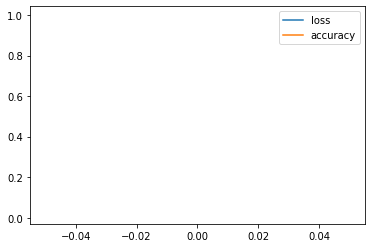

In [18]:
# plot the loss and accuracy
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.legend()
plt.show()

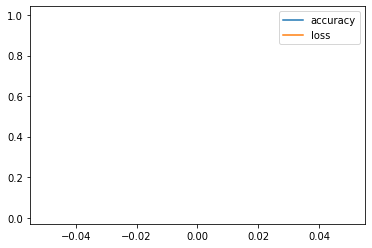

In [19]:
# Render accuracy and validation loss
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()